In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [29]:
print('Shape: ', df.shape)
df.info()

Shape:  (2017, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4

In [30]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [31]:
df.nunique()

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
target                 2
song_title          1956
artist              1343
dtype: int64

In [32]:
df['target'].value_counts()

target
1    1020
0     997
Name: count, dtype: int64

In [33]:
df.duplicated().value_counts()

False    2012
True        5
Name: count, dtype: int64

In [34]:
df = df.drop_duplicates()
df.duplicated().value_counts()

False    2012
Name: count, dtype: int64

In [35]:
num_cols = list(df.select_dtypes(exclude=['object']).columns)
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols, cat_cols

(['acousticness',
  'danceability',
  'duration_ms',
  'energy',
  'instrumentalness',
  'key',
  'liveness',
  'loudness',
  'mode',
  'speechiness',
  'tempo',
  'time_signature',
  'valence',
  'target'],
 ['song_title', 'artist'])

<Axes: >

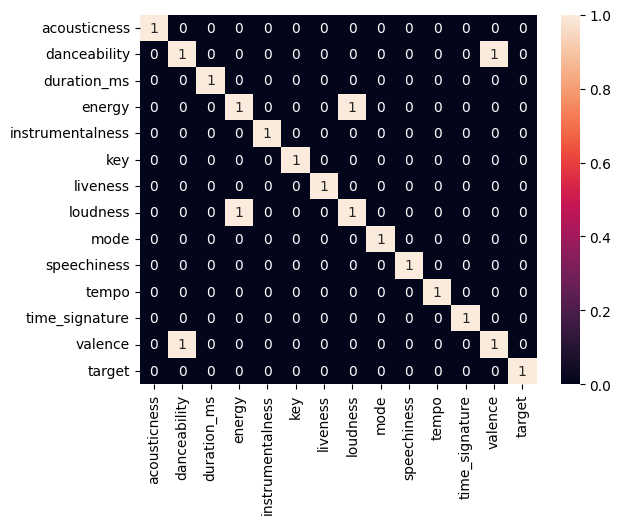

In [36]:
sns.heatmap(df[num_cols].corr()>0.4, annot=True)

<Axes: >

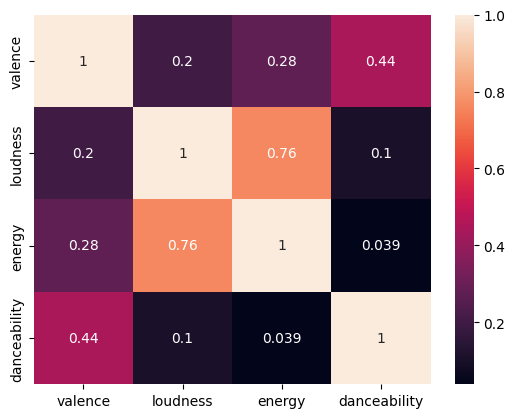

In [37]:
df_heatmap = df[['valence', 'loudness', 'energy', 'danceability']].corr()
sns.heatmap(df_heatmap, annot=True)

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

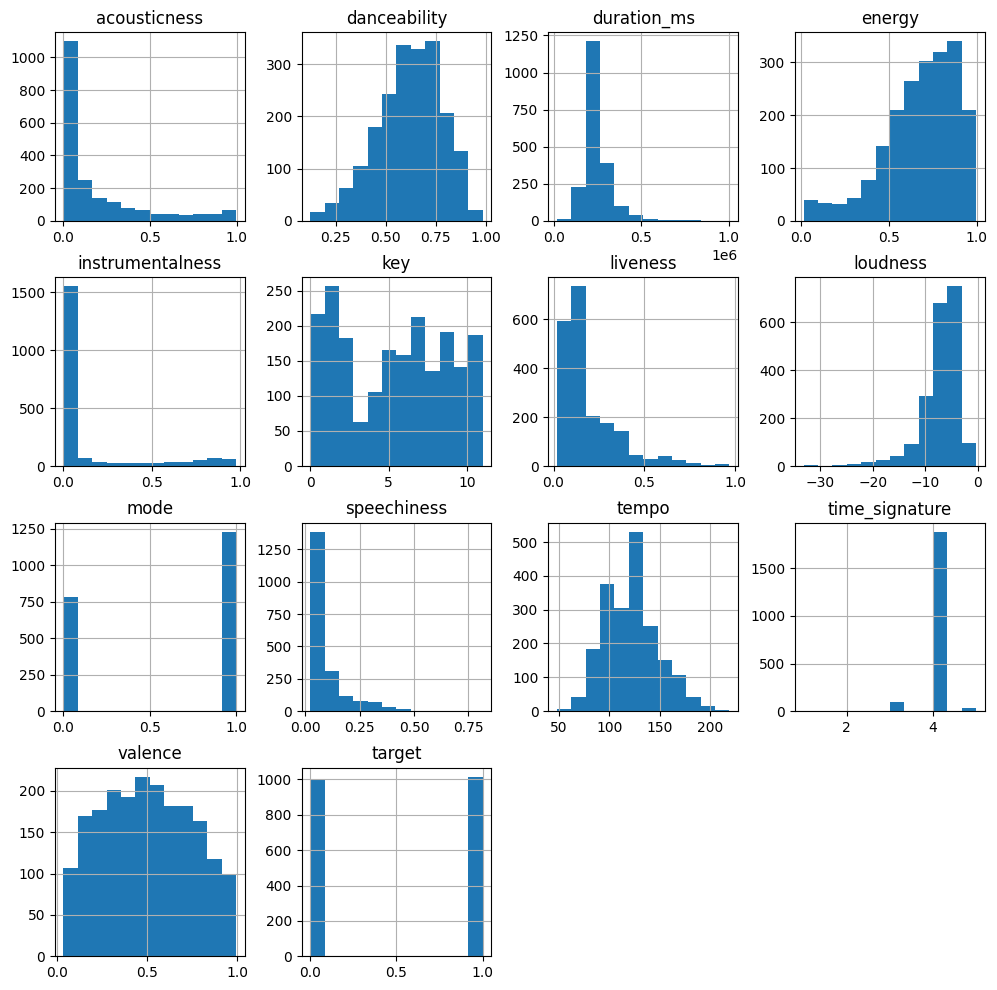

In [38]:
df.hist(figsize=(12,12), bins=12)

In [39]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

x = df.drop('song_title', axis=1)
y = df['song_title']

le = LabelEncoder()
x['artist'] = le.fit_transform(x['artist'])

mms = MinMaxScaler()
x = mms.fit_transform(x)

pca = PCA(n_components=8)
x = pca.fit_transform(x)

x[23,:].reshape(-1,1)

array([[ 0.79020366],
       [-0.29693188],
       [-0.17178421],
       [ 0.3539228 ],
       [ 0.3925759 ],
       [ 0.28572037],
       [-0.40583335],
       [-0.19301415]])

In [41]:
from numpy import dot
from numpy.linalg import norm

def cosine_sim(query, index):
    cosine = []
    query = np.array(x[query,:])
    for i in range(len(index[0])):
        temp = np.array(x[index[0][i],:])
        score = dot(query, temp)/(norm(query)*norm(temp))
        cosine.append(score)
    return cosine 

In [42]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(x)

query = np.random.choice(x.shape[0])

distances, index = nn.kneighbors(x[query,:].reshape(1,-1), n_neighbors=6)
cosine = cosine_sim(query, index)
cosine

[np.float64(0.9999999999999999),
 np.float64(0.9822474016990443),
 np.float64(0.9773085345915855),
 np.float64(0.9713621678649276),
 np.float64(0.9614074041132853),
 np.float64(0.9547795667065195)]

In [45]:
for i in range(len(index[0])):
    if i == 0:
        print('Recommendation for {0}: '.format(df.iloc[query]['song_title']), end='\n\n')
    else:
        recommended_song = df.iloc[index[0][i]]['song_title'] 
        print('{}: {}, with distance of {:.2f}%'.format(i, recommended_song, distances.flatten()[i]))


Recommendation for Dopeman: 

1: Two Of Hearts, with distance of 0.02%
2: Elevate - Q45 Remix, with distance of 0.02%
3: Agorinha, with distance of 0.03%
4: Sweater Weather, with distance of 0.04%
5: Black Mags, with distance of 0.05%


In [47]:
for i in range(len(index.flatten())):
    if i == 0:
        print('Recommendation for {0}: '.format(df.iloc[query]['song_title']), end='\n\n')
    else:
        recommended_song = df.iloc[index.flatten()[i]]['song_title'] 
        print('{}: {}, with similarity of {:.2f}%'.format(i, recommended_song, cosine[i]*100))

Recommendation for Dopeman: 

1: Two Of Hearts, with similarity of 98.22%
2: Elevate - Q45 Remix, with similarity of 97.73%
3: Agorinha, with similarity of 97.14%
4: Sweater Weather, with similarity of 96.14%
5: Black Mags, with similarity of 95.48%
